# Simple test for DTW-SOM implementation

### 1. Load packages

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from pyclustering.nnet.som import type_conn
# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
import dtwsom

### 2. Generate dummy dataset

First we need to define the functions to generate the dataset. This is a simple dataset with two clearly defined clusters - one we a noisy sin function centered at 0 and another with a noisy line centered at 10.

In [2]:
def gen_noisy_sine_list(f0, fs, mean_dur, size):
    final_list = []
    for i in range(size):
        dur = random.sample([mean_dur-1, mean_dur, mean_dur+1], 1)[0]
        t = np.arange(dur)
        sinusoid = np.sin(2*np.pi*t*(f0/fs))
        noise = np.random.normal(0,0.3, dur)
        noisy_sinusoid = noise + sinusoid
        final_list.append(noisy_sinusoid)
    return final_list

def gen_noisy_list(mean_dur, size):
    final_list = []
    for i in range(size):
        dur = random.sample([mean_dur-1, mean_dur, mean_dur+1], 1)[0]
        noise = np.random.normal(0,0.3, dur)+10
        final_list.append(noise)
    return final_list

Now we can generate the dummy dataset:

In [3]:
sin_dataset = gen_noisy_sine_list(1, 10, 25, 50) + gen_noisy_list(20, 50)
anchors = [sin_dataset[0], sin_dataset[-1]]
random.shuffle(sin_dataset)
len(sin_dataset)

100

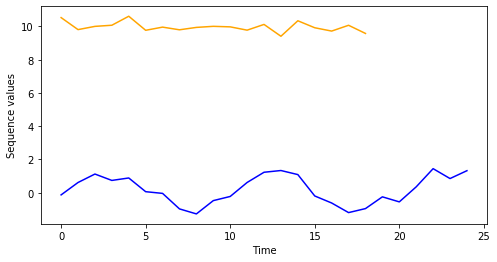

In [4]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(anchors[0])), anchors[0], color='blue')
plt.plot(np.arange(len(anchors[1])), anchors[1], color='orange')
plt.ylabel("Sequence values")
plt.xlabel("Time")
plt.show()

### 3. Train DTW-SOM with random initialization and view results

In [5]:
%time
rows = 3
cols = 3
structure = type_conn.grid_four
network = dtwsom.DtwSom(rows, cols, structure)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 14.1 µs


In [6]:
%%time
network.train(sin_dataset, 20)

Epoch 1 achieved an average quantization error of 1.1067
Epoch 2 achieved an average quantization error of 1.1388
Epoch 3 achieved an average quantization error of 1.0603
Epoch 4 achieved an average quantization error of 1.039
Epoch 5 achieved an average quantization error of 1.0347
Epoch 6 achieved an average quantization error of 1.0323
Epoch 7 achieved an average quantization error of 1.028
Epoch 8 achieved an average quantization error of 1.0255
Epoch 9 achieved an average quantization error of 1.0217
Epoch 10 achieved an average quantization error of 1.0146
Epoch 11 achieved an average quantization error of 1.0103
Epoch 12 achieved an average quantization error of 1.0095
Epoch 13 achieved an average quantization error of 1.0085
Epoch 14 achieved an average quantization error of 1.0057
Epoch 15 achieved an average quantization error of 1.0027
Epoch 16 achieved an average quantization error of 0.9985
Epoch 17 achieved an average quantization error of 0.9946
Epoch 18 achieved an aver

20

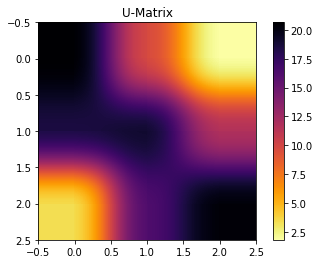

In [7]:
network.show_distance_matrix()

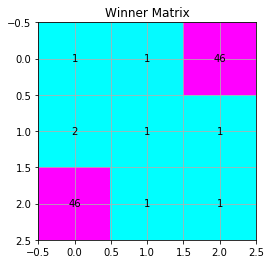

In [8]:
network.show_winner_matrix()

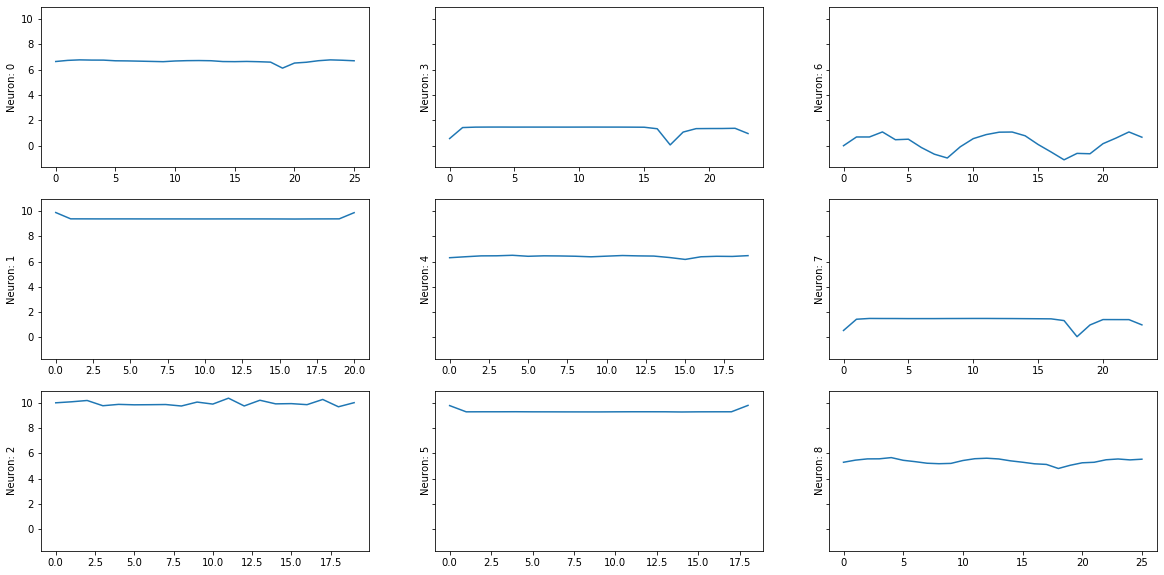

In [9]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(20, 10), sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3)
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_ylabel("Neuron: "+str(neuron_index))
plt.show()

### 4. Train DTW-SOM with anchors initialization and view results

In [10]:
%time
rows = 3
cols = 3
structure = type_conn.grid_four
parameters = dtwsom.DtwSomParameters()
parameters.init_type = dtwsom.DtwTypeInit.anchors
network = dtwsom.DtwSom(rows, cols, structure, parameters=parameters)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


In [11]:
%%time
network.train(sin_dataset, 20, anchors=anchors)

Epoch 1 achieved an average quantization error of 1.4771
Epoch 2 achieved an average quantization error of 1.2312
Epoch 3 achieved an average quantization error of 1.1458
Epoch 4 achieved an average quantization error of 1.2154
Epoch 5 achieved an average quantization error of 1.2713
Epoch 6 achieved an average quantization error of 1.3054
Epoch 7 achieved an average quantization error of 1.3111
Epoch 8 achieved an average quantization error of 1.2974
Epoch 9 achieved an average quantization error of 1.2877
Epoch 10 achieved an average quantization error of 1.2789
Epoch 11 achieved an average quantization error of 1.271
Epoch 12 achieved an average quantization error of 1.2631
Epoch 13 achieved an average quantization error of 1.2551
Epoch 14 achieved an average quantization error of 1.2129
Epoch 15 achieved an average quantization error of 1.1694
Epoch 16 achieved an average quantization error of 1.1397
Epoch 17 achieved an average quantization error of 1.1176
Epoch 18 achieved an ave

20

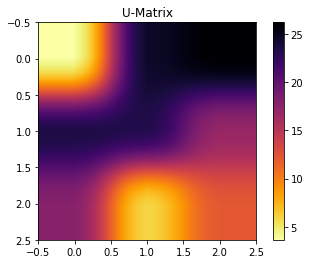

In [12]:
network.show_distance_matrix()

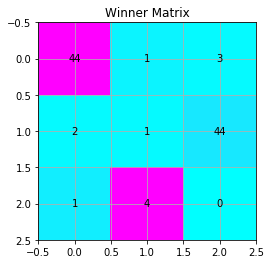

In [13]:
network.show_winner_matrix()

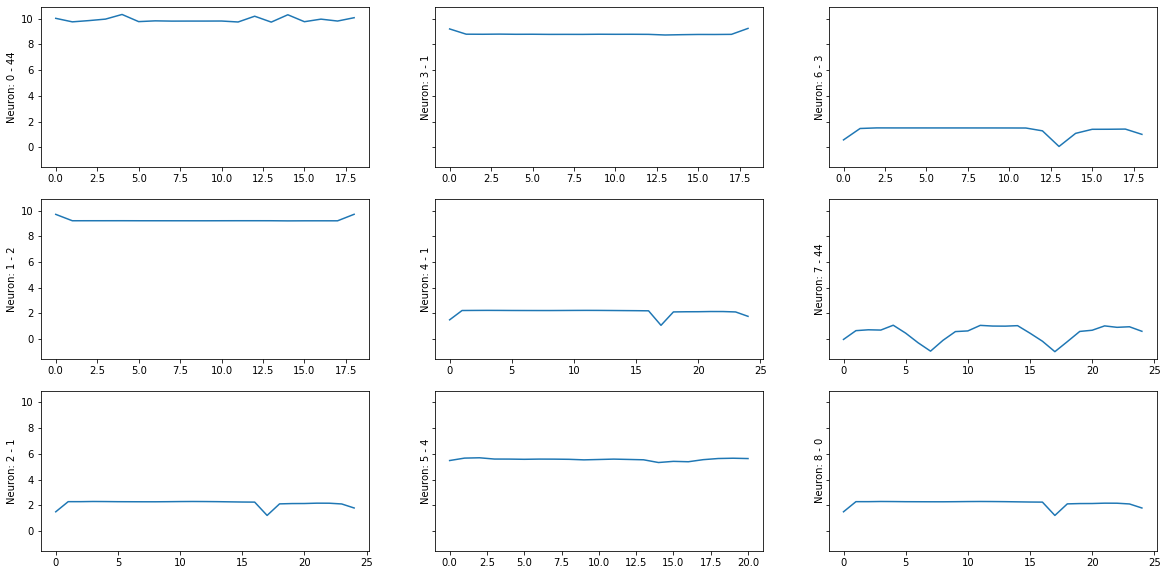

In [14]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(20, 10), sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3)
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    neuron_awards = network._award[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_ylabel("Neuron: "+str(neuron_index)+" - "+str(neuron_awards))
plt.show()